In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Генерация данных

In [ ]:
SEED = 42
X, y = make_moons(n_samples=1000, noise=0.2, random_state=SEED)
# X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42) # С другими данными поиграться

# Визуализация данных

[]

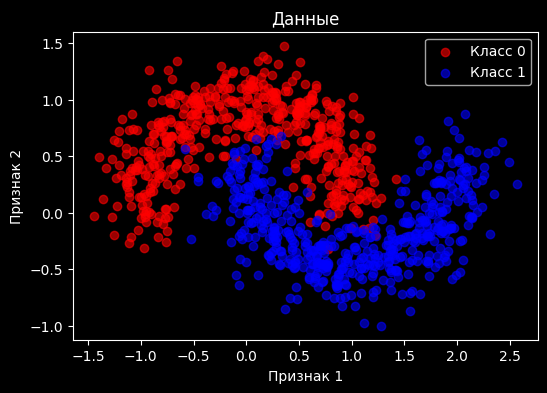

In [69]:
plt.figure(figsize=(6, 4))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.6, label='Класс 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.6, label='Класс 1')

plt.title('Данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.legend()

plt.plot()

# Моделька

In [70]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Обработка данных

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

# Масштабируем
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Добро пожаловать в строготипизированный python
# Приводим к нужному для пайторч типу и размерам
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

# Обучение модели

In [72]:
# Инициализируем все нужное
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
train_losses = []

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Эпоха [{epoch}/{epochs}], loss: {loss.item():.4f}')

Эпоха [0/1000], loss: 0.6450
Эпоха [100/1000], loss: 0.2905
Эпоха [200/1000], loss: 0.2794
Эпоха [300/1000], loss: 0.2667
Эпоха [400/1000], loss: 0.2595
Эпоха [500/1000], loss: 0.2556
Эпоха [600/1000], loss: 0.2532
Эпоха [700/1000], loss: 0.2518
Эпоха [800/1000], loss: 0.2510
Эпоха [900/1000], loss: 0.2505


# Оценка модели

[]

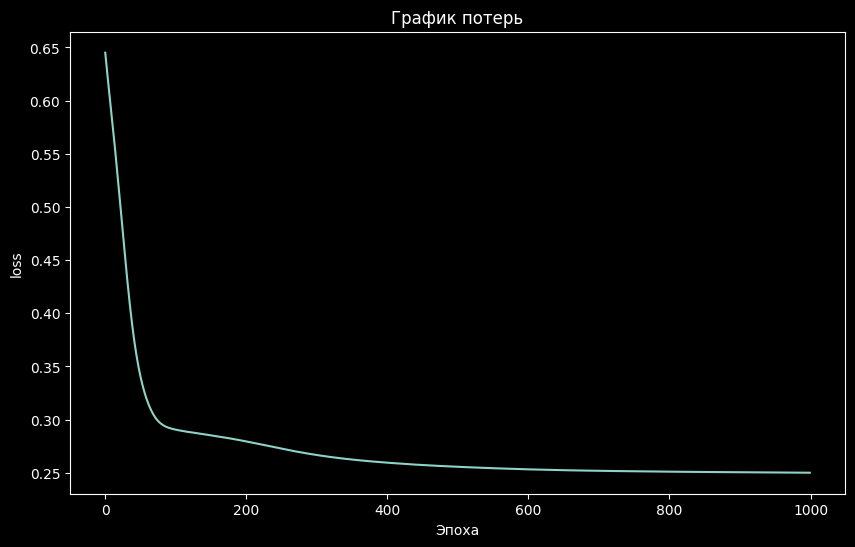

In [73]:
plt.figure(figsize=(10, 6))

plt.plot(train_losses)

plt.title('График потерь')

plt.xlabel('Эпоха')
plt.ylabel('loss')

plt.plot()

In [74]:
model.eval()
with torch.no_grad():
    # Предсказания на тестовых данных
    test_outputs = model(X_test)
    test_preds = (test_outputs > 0.5).float()
    test_accuracy = accuracy_score(y_test, test_preds)

print(f"Accuracy: {test_accuracy:.4f}")

Accuracy: 0.8600


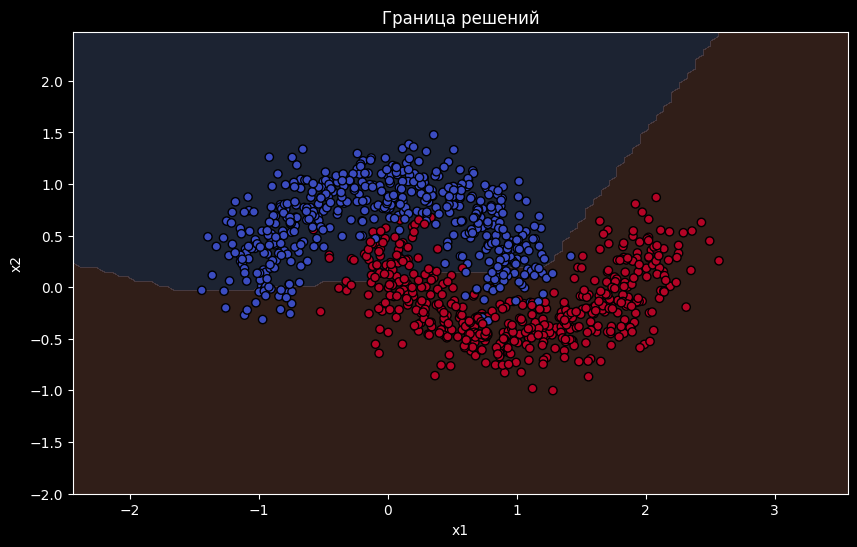

In [75]:
# Нагло воруем (адаптируем) код из лабы 2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)
mesh_tensor = torch.FloatTensor(mesh_points_scaled)

with torch.no_grad():
    Z = model(mesh_tensor)
    Z = (Z > 0.5).float().numpy().reshape(xx.shape)

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title(f'Граница решений')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

# Решаем для XOR

[]

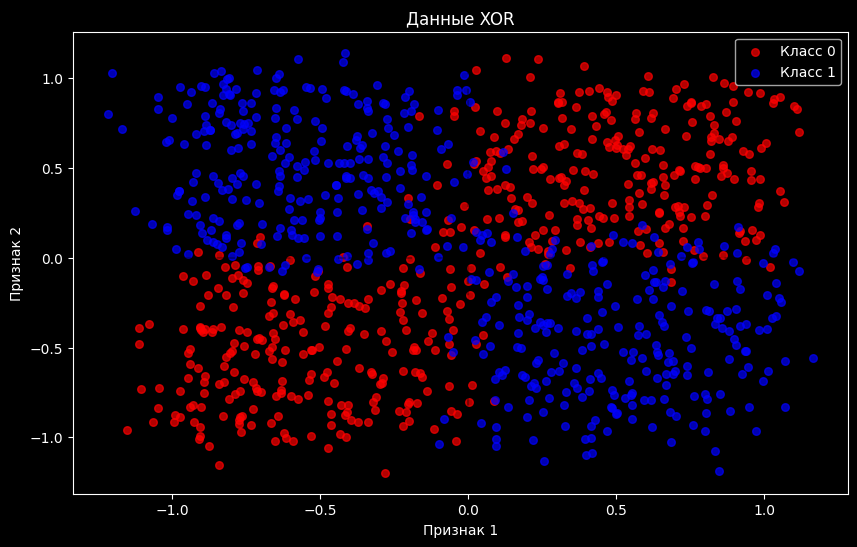

In [76]:
# Генерим данные
np.random.seed(SEED)

n_samples = 1000
X = np.random.uniform(-1, 1, (n_samples, 2))
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
# + шум
X += np.random.normal(0, 0.1, X.shape)


plt.figure(figsize=(10, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.7, label='Класс 0', s=30)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.7, label='Класс 1', s=30)

plt.title('Данные XOR')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.legend()

plt.plot()

In [83]:
# Предобработка
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

In [84]:
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [85]:
epochs = 1000
train_losses = []

for epoch in range(epochs):
    # Обучение
    model.train()
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    train_losses.append(train_loss.item())
    
    if epoch % 100 == 0:
        train_preds = (train_outputs > 0.5).float()
        train_acc = accuracy_score(y_train, train_preds)
        print(f'Эпоха [{epoch:4d}/{epochs}], loss: {train_loss.item():.4f}')

Эпоха [   0/1000], loss: 0.7013
Эпоха [ 100/1000], loss: 0.4822
Эпоха [ 200/1000], loss: 0.2738
Эпоха [ 300/1000], loss: 0.2212
Эпоха [ 400/1000], loss: 0.2056
Эпоха [ 500/1000], loss: 0.2001
Эпоха [ 600/1000], loss: 0.1966
Эпоха [ 700/1000], loss: 0.1944
Эпоха [ 800/1000], loss: 0.1933
Эпоха [ 900/1000], loss: 0.1929


[]

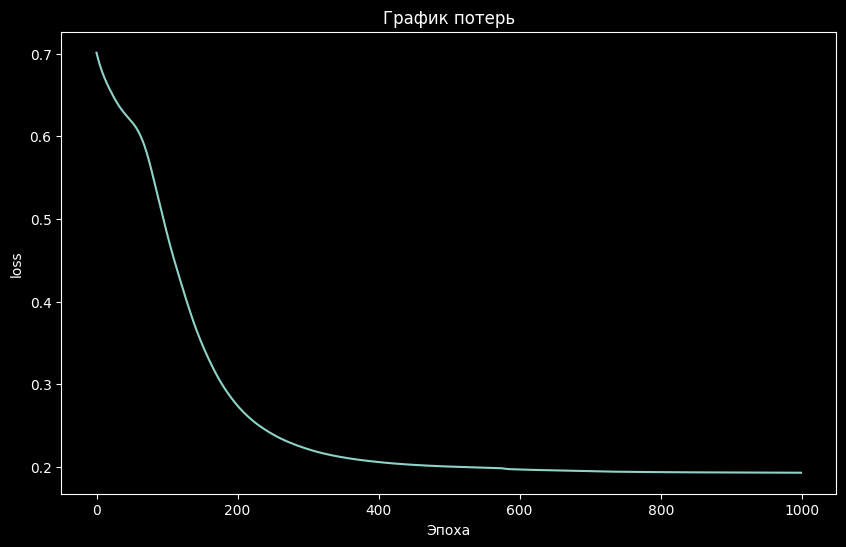

In [86]:
plt.figure(figsize=(10, 6))

plt.plot(train_losses)

plt.title('График потерь')

plt.xlabel('Эпоха')
plt.ylabel('loss')

plt.plot()

In [87]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_preds = (test_outputs > 0.5).float().numpy().flatten()
    test_accuracy = accuracy_score(y_test, test_preds)

print(f"Accuracy: {test_accuracy:.4f}")

Accuracy: 0.9100


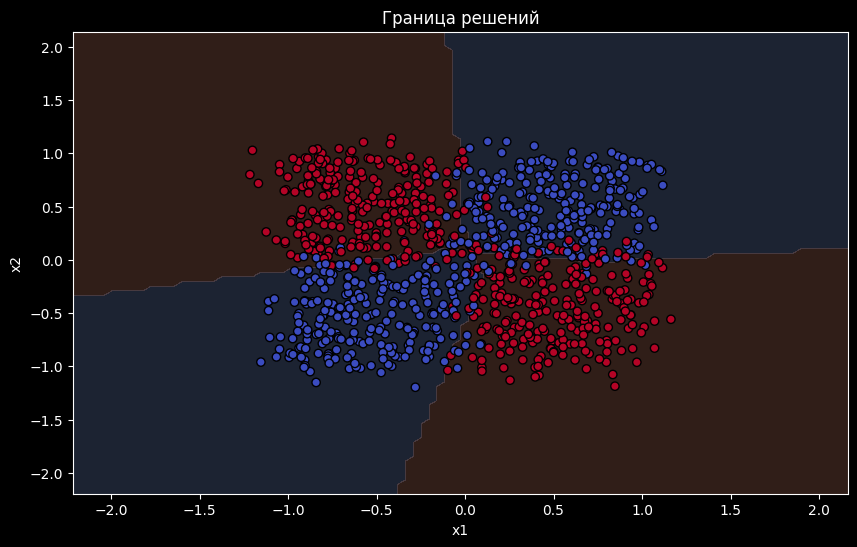

In [88]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)
mesh_tensor = torch.FloatTensor(mesh_points_scaled)

with torch.no_grad():
    Z = model(mesh_tensor)
    Z = (Z > 0.5).float().numpy().reshape(xx.shape)

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title(f'Граница решений')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

**Итого: Наличие скрытого слоя позволяет решать линейно-неразделимые задачи, например XOR**